In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']),encoding="ISO-8859-1")
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


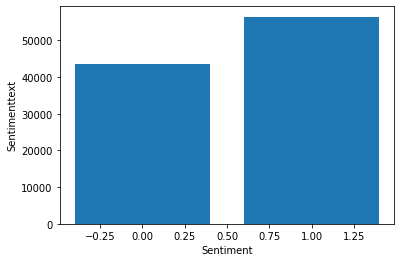

In [10]:
data.Sentiment.value_counts()
countEmotion=data.groupby('Sentiment').count()
plt.bar(countEmotion.index.values, countEmotion['SentimentText'])
plt.xlabel('Sentiment')
plt.ylabel('Sentimenttext')
plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [12]:
train , test = train_test_split(data,test_size=0.20)
train.head()

,ItemID,Sentiment,SentimentText
79959,79971,0,@chairiste Wish I could be searching with you
52664,52676,1,@assistedsuicide What what what?
32269,32281,0,"@ali85035 RIGHT ON GIRL! poor guy, crying in h..."
9716,9728,1,#Follow Friday @montill @djaaries @karimaDaCro...
12797,12809,1,&quot;Footloose&quot;:The bottom portion of a ...


In [13]:
text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

In [15]:
text_clf.fit(train['SentimentText'],train['Sentiment'])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [16]:
predicted = text_clf.predict(test['SentimentText'])

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [19]:
print('Accuracy achieved is ' + str(np.mean(predicted == test['Sentiment'])))


Accuracy achieved is 0.7405740574057406


In [21]:
print(metrics.classification_report(test['Sentiment'], predicted)),


              precision    recall  f1-score   support

           0       0.80      0.55      0.65      8739
           1       0.72      0.89      0.79     11259

    accuracy                           0.74     19998
   macro avg       0.76      0.72      0.72     19998
weighted avg       0.75      0.74      0.73     19998



(None,)

In [26]:
cm = metrics.confusion_matrix(test['Sentiment'], predicted)
print(cm)

[[ 4774  3965]
 [ 1223 10036]]


In [27]:
import seaborn as sn

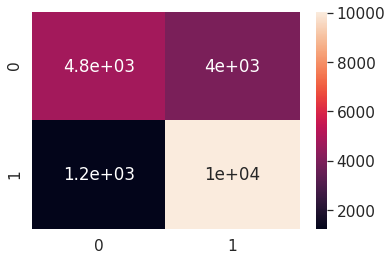

In [29]:
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()